## Movies
In this part of mini-project, we need to have our API-KEY ready because this API won't work without it.

We encourage you to look for correct endpoints in [the documentation](https://developers.themoviedb.org/3/account). We can also play around with requests there before copying them to Python.

In [1]:
import requests as re
import os
import json
import cpi
from IPython.display import JSON

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## Demo

In [2]:
base = "https://api.themoviedb.org/3"
url = "/search/movie"

query = 'The Shining'
api_key = os.environ["TheMovieDB_API_Key"]
params = f'?query={query}&api_key={api_key}' 

In [3]:
res = re.get(base+url+params)

In [5]:
res.status_code

200

In [13]:
JSON(res.json())

<IPython.core.display.JSON object>

## Task
Search for you favorite movie and return the information about the movie:
- name
- release date
- runtime
- revenue
- length of the overview
- number of votes
- voting average

In [4]:
def FaveMovie(name):
    root_endpoint = "https://api.themoviedb.org/3"        
    api_method = "/search/movie"
    endpoint = root_endpoint + api_method
    
    res = re.get(endpoint, params={'query': name, 'api_key': api_key})
    movieID = res.json()['results'][0]['id']
    #movieID = TheShiningResults['results'][0]['id']
    
    api_method = f'/movie/{movieID}'
    endpoint = root_endpoint + api_method
    res = re.get(endpoint, params={'api_key': api_key})
    
    title = res.json()['original_title']
    tagline = res.json()['tagline']
    year = int(res.json()['release_date'][0:4])
    revenue = res.json()['revenue']
    infl_revenue = round(cpi.inflate(revenue,year))
    voteAvg = res.json()['vote_average']
    
    #infoList = [title, tagline, year, revenue, infl_revenue, voteAvg]
    infoList = [title, tagline, year, revenue, infl_revenue]
    
    return infoList

FaveMovie('The Shining')

['The Shining',
 "He came as the caretaker, but this hotel had its own guardians - who'd been there a long time",
 1980,
 44781695,
 140655282]

In [22]:
TheGBUStats = FaveMovie('The Good, the Bad and the Ugly')
TheShiningStats = FaveMovie('The Shining')
TheDarkKnightStats = FaveMovie('The Dark Knight')
InceptionStats = FaveMovie('Inception')

print(TheGBUStats[1])
print(TheShiningStats[1])
print(TheDarkKnightStats[1])
print(InceptionStats[1])

For three men the Civil War wasn't hell. It was practice.
He came as the caretaker, but this hotel had its own guardians - who'd been there a long time
Why So Serious?
Your mind is the scene of the crime.


In [17]:
JSON(TheShiningDetails)

<IPython.core.display.JSON object>

In [13]:
print(TheGBUStats[0])

Il buono, il brutto, il cattivo


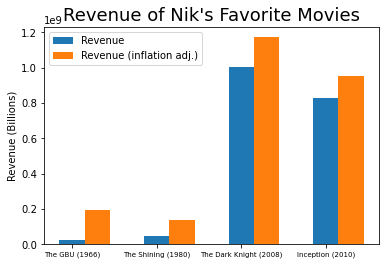

In [49]:
movie_names = ["The GBU"+' ('+str(TheGBUStats[2])+')',TheShiningStats[0]+' ('+str(TheShiningStats[2])+')',TheDarkKnightStats[0]+' ('+str(TheDarkKnightStats[2])+')',InceptionStats[0]+' ('+str(InceptionStats[2])+')']

original_revenue = [TheGBUStats[3],TheShiningStats[3],TheDarkKnightStats[3],InceptionStats[3]]
inflated_revenue = [TheGBUStats[4],TheShiningStats[4],TheDarkKnightStats[4],InceptionStats[4]]

width =0.3
plt.bar(np.arange(len(original_revenue)), original_revenue, width=width)
plt.bar(np.arange(len(inflated_revenue))+ width, inflated_revenue, width=width)
plt.xticks(range(len(original_revenue)), movie_names)
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
#plt.xlabel('Movie Titles')
plt.ylabel('Revenue (Billions)')
plt.legend(['Revenue', 'Revenue (inflation adj.)'],loc=2)
plt.title("Revenue of Nik's Favorite Movies",fontsize=18)
plt.savefig("myimage.pdf", dpi=1200)
plt.show()

## Task
Search for you favorite actor/actress and return the information about him/her:
- name
- date of birth
- place of birth
- length of the biography

## Task
Search for you favorite tv-show and return the information about it:
- name
- first air date
- number of seasons
- number of episodes
- genres

## Task 
Find top 5 trending:
- movies
- tv-shows
- people